In [53]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis

In [3]:
data = pd.read_pickle('dataset/output/data_cleaned.pkl')

In [4]:
print("The data size: ", data.shape)

The data size:  (956, 8)


In [5]:
data.head()

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,CustomerID,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00+07:00,13085,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00+07:00,13085,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00+07:00,13085,6.75,United Kingdom
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00+07:00,13085,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00+07:00,13085,1.25,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype                           
---  ------       --------------  -----                           
 0   InvoiceID    956 non-null    object                          
 1   StockCode    956 non-null    object                          
 2   Description  956 non-null    object                          
 3   Quantity     956 non-null    int64                           
 4   InvoiceDate  956 non-null    datetime64[ns, Asia/Ho_Chi_Minh]
 5   CustomerID   956 non-null    int64                           
 6   Price        956 non-null    float64                         
 7   Country      956 non-null    object                          
dtypes: datetime64[ns, Asia/Ho_Chi_Minh](1), float64(1), int64(2), object(4)
memory usage: 59.9+ KB


There are 8 features that correspond to: <br><br>
**- InvoiceID**: a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation<br>
**- StockCode**: a 5-digit integral number uniquely assigned to each distinct product <br>
**- Description**: the product name <br>
**- Quantity**: the quantities of each product per transaction <br>
**- InvoiceDate**: the day and time when each transaction was generated <br>
**- CustomerID**: a 5-digit integral number uniquely assigned to each customer <br>
**- Price**: product price per unit <br>
**- Country**: the name of the country where each customer resides 

In [7]:
print("Number of transactions:", data['InvoiceID'].nunique())
print("Number of products:", data['StockCode'].nunique())
print("Number of customers:", data['CustomerID'].nunique())
print('Number of countries: ', data['Country'].nunique())

Number of transactions: 60
Number of products: 613
Number of customers: 50
Number of countries:  7


In [8]:
cancelled_orders = data[data['InvoiceID'].astype(str).str.contains('C')]
print("Number of cancelled invoices is:", cancelled_orders.shape[0])


Number of cancelled invoices is: 41


### 1.1. The number of orders per customer

In [21]:
# get unique invoice number per customer
invoice_per_customer = pd.DataFrame(data.groupby('CustomerID')['InvoiceID'].nunique())
invoice_per_customer.head(10)

,InvoiceID
CustomerID,
0,5
12362,1
12533,1
12615,1
12636,1
12682,1
12913,1
12931,1
13078,1


We can see eaach person only have 1 or 2 invoice. Customer of zero is NA customer, it's quite large and that would cause noise to the data

### 1.2. The average number of unique items per order

In [38]:
invoice_per_item = pd.DataFrame(data.groupby('InvoiceID')['StockCode'].nunique())
invoice_per_item.columns=['ProductNumber']
invoice_per_item.head(10)

,ProductNumber
InvoiceID,
489434,8
489435,4
489436,19
489437,23
489438,17
489439,19
489440,2
489441,4
489442,23


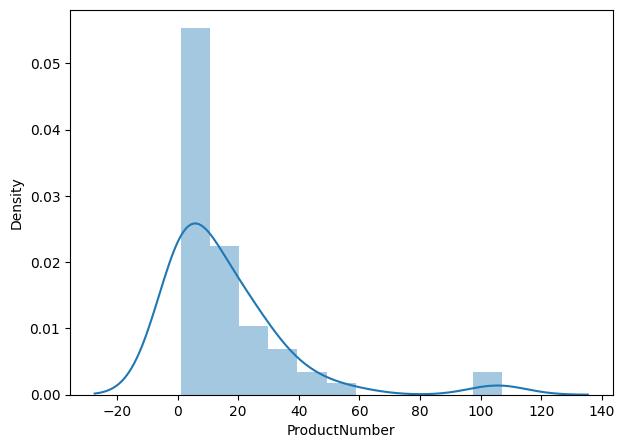

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
sns.distplot(invoice_per_item['ProductNumber'],ax=ax)
plt.show()

### 1.3. The number of customer per country

In [48]:
customer_per_country = pd.DataFrame(data.groupby('Country')['CustomerID'].nunique())
customer_per_country.columns=['CustomerNumber']
customer_per_country.head(10)

,CustomerNumber
Country,
Australia,1
Belgium,1
EIRE,1
France,2
Germany,1
USA,1
United Kingdom,43


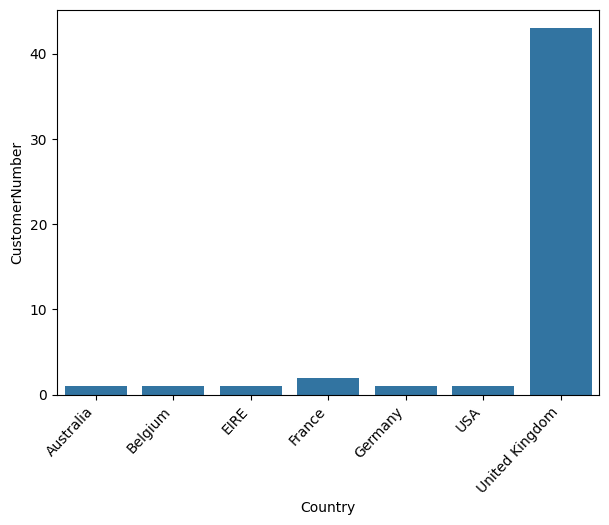

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=sns.barplot(x='Country', y='CustomerNumber',data=customer_per_country,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

### 1.4. Top 10 product that are most bought

In [56]:
product_num = data.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
product_num.head(10)

,Description,Quantity
34,ASSORTED COLOUR BIRD ORNAMENT,1080
80,BOYS ALPHABET IRON ON PATCHES,576
340,PAPER CHAIN KIT 50'S CHRISTMAS,290
216,GIRLS ALPHABET IRON ON PATCHES,288
341,PAPER CHAIN KIT RETRO SPOT,266
54,BLACK AND WHITE PAISLEY FLOWER MUG,216
496,SET/4 BLUE FLOWER CANDLES IN BOWL,192
527,SLEEPING CAT ERASERS,180
586,WHITE HANGING HEART T-LIGHT HOLDER,146
47,BIG DOUGHNUT FRIDGE MAGNETS,144
